**Name**: **Dhayanithi** **T**,
**Internsavy** **Task** - 2

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#import the datasets
df = pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
#description of dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.rename(index=str, columns={'Genre':'Gender'}, inplace=True)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
#to counts row of gender
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
#categorical data
df_cat=df.select_dtypes(object)

In [9]:
#create a object of class LabelEncoder
le=LabelEncoder()

In [10]:
#convert Gender colummn datatype object to int
df['Gender']=le.fit_transform(df_cat["Gender"])

In [11]:
#check null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

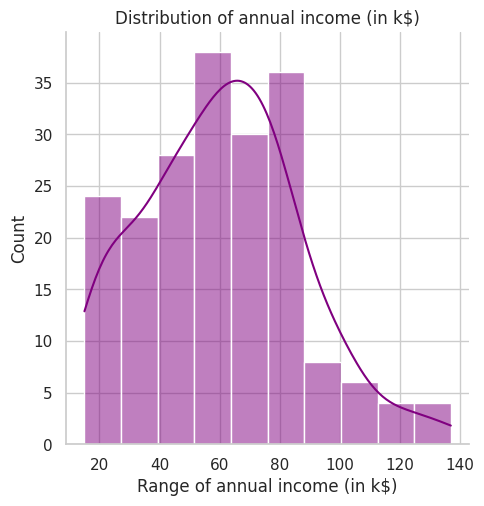

In [12]:
# Distribution of Annual Income
sns.set(style = 'whitegrid')
sns.displot(df['Annual Income (k$)'], kde = True, color = 'purple')
plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

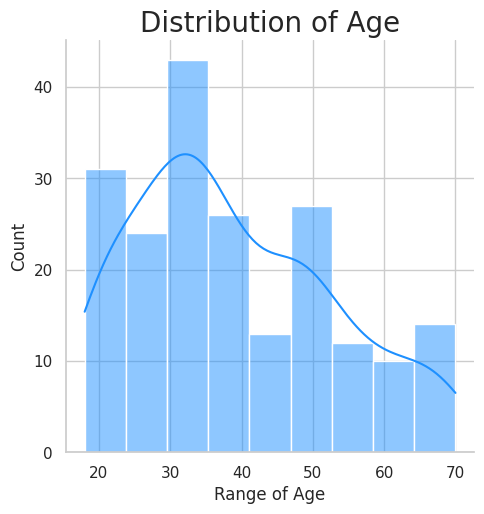

In [13]:
# distribution of Age
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()

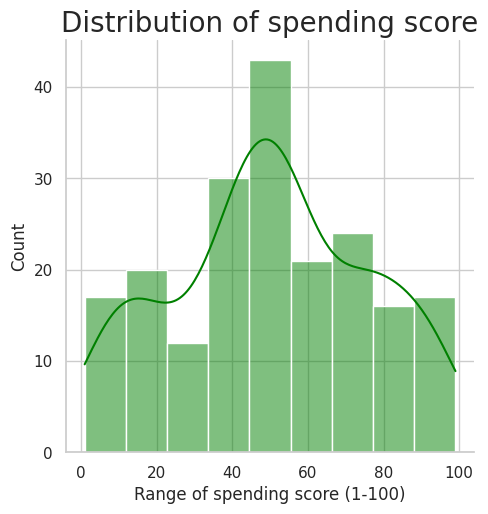

In [14]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["Spending Score (1-100)"], kde=True, color="green")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

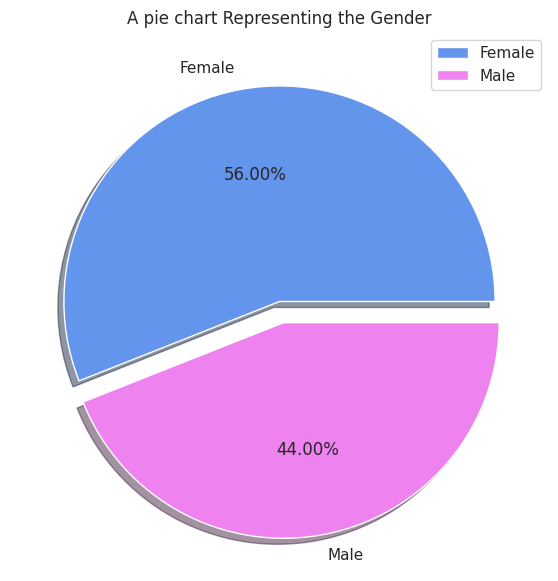

In [15]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['cornflowerblue', 'violet']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

In [16]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 500x500 with 0 Axes>

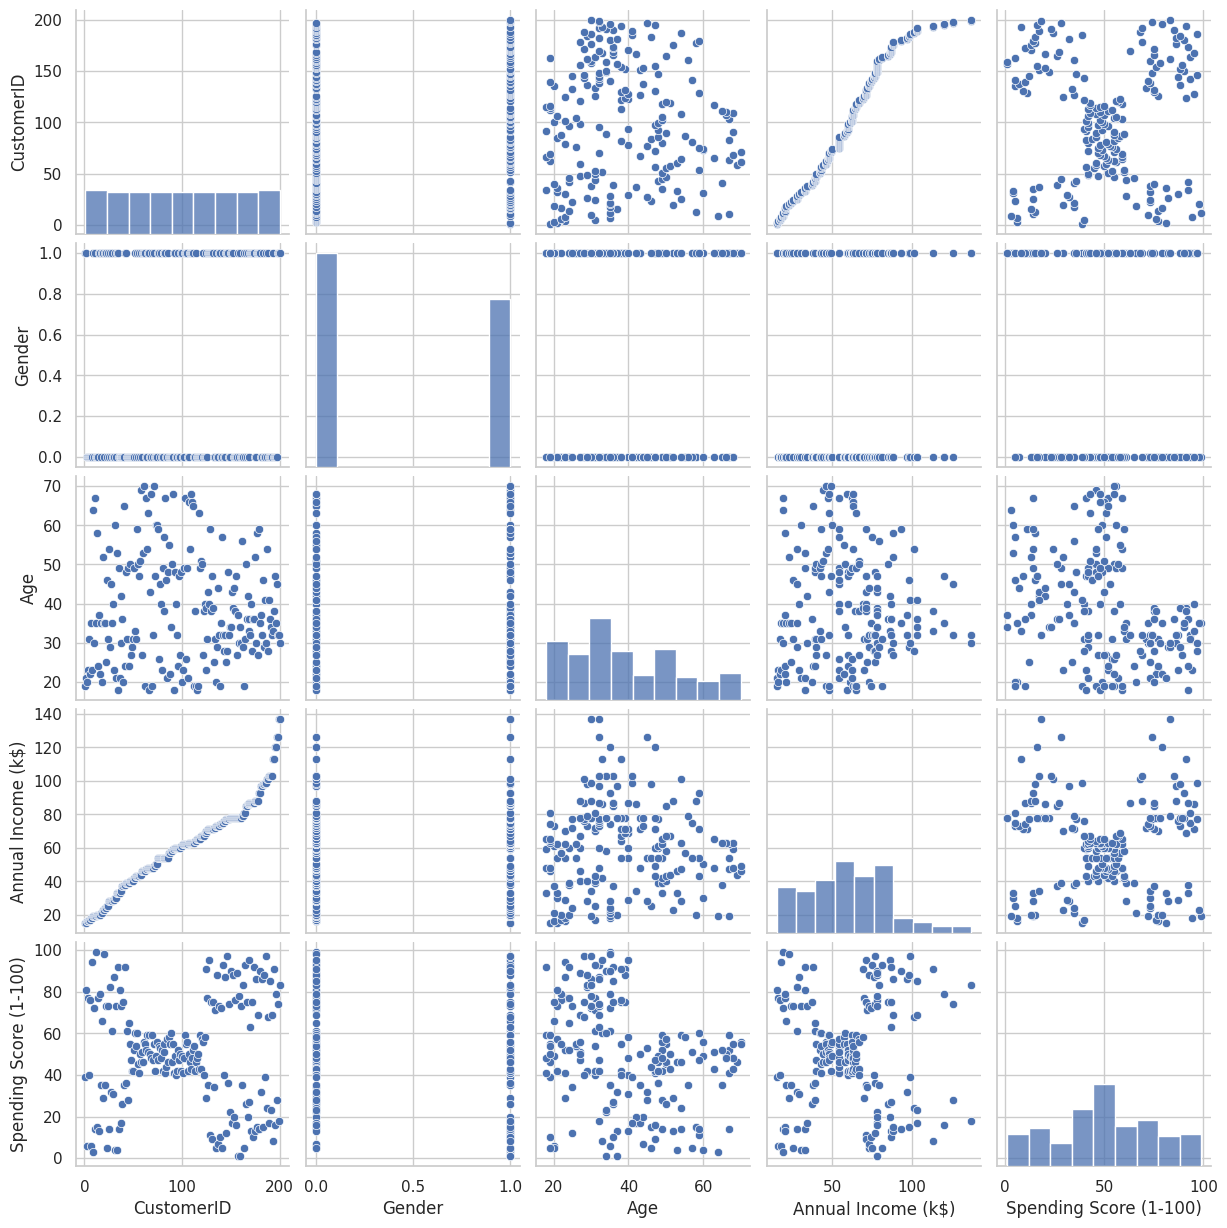

In [17]:
plt.figure(figsize = (5,5))
sns.pairplot(df, palette = 'hls')
plt.show()

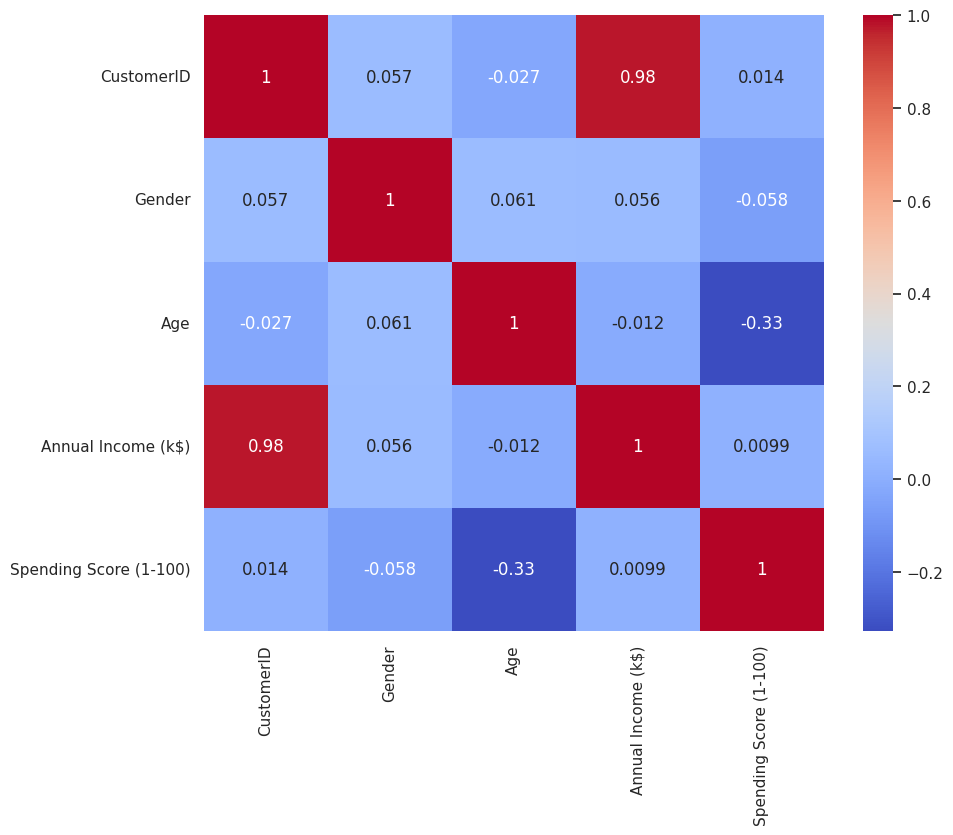

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm',annot = True)
plt.show()

In [19]:
scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])

In [20]:
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959


In [21]:
X= df.iloc[:, [3,4]].values

Model Evaluation

In [22]:
#sum of squared error(SSE)
sse=[] #blank array for SSE
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

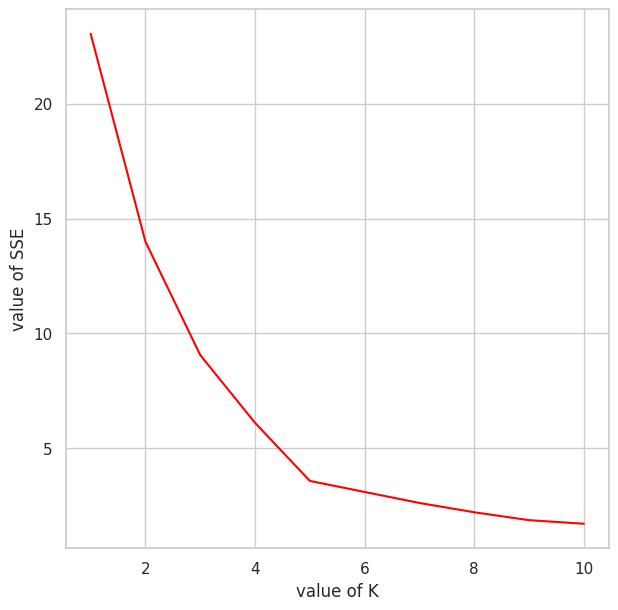

In [23]:
#we plot 2D graph
plt.xlabel('value of K')
plt.ylabel('value of SSE')
plt.plot(k_rng,sse,color="red")
plt.show()

In [24]:
x = df.iloc[:, [3, 4]].values

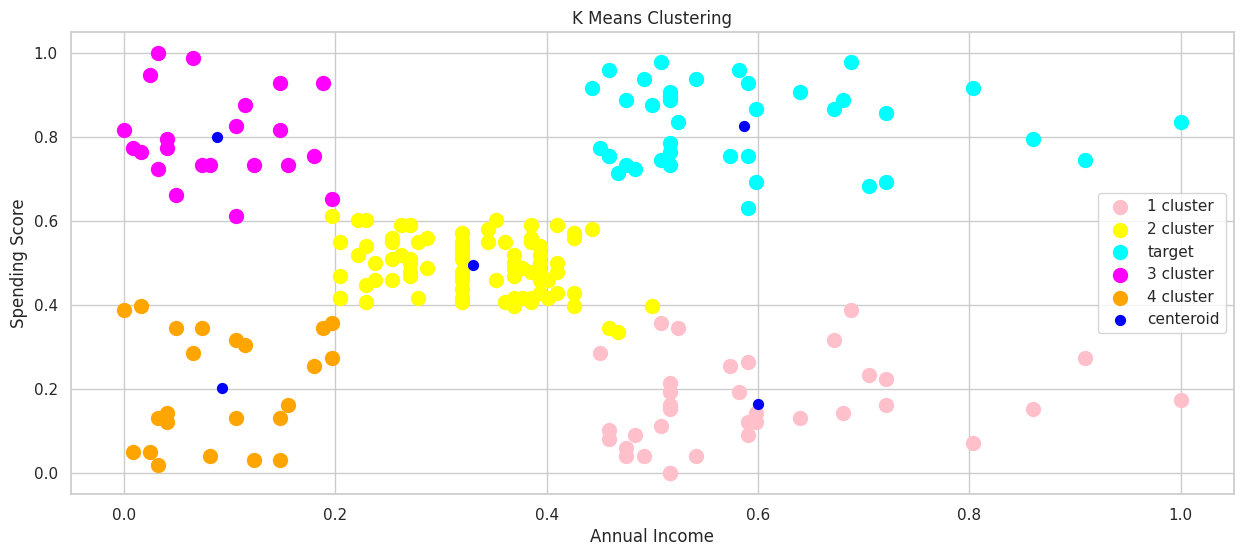

In [25]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.figure(figsize = (15,6))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = '1 cluster')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = '2 cluster')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = '3 cluster')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = '4 cluster')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

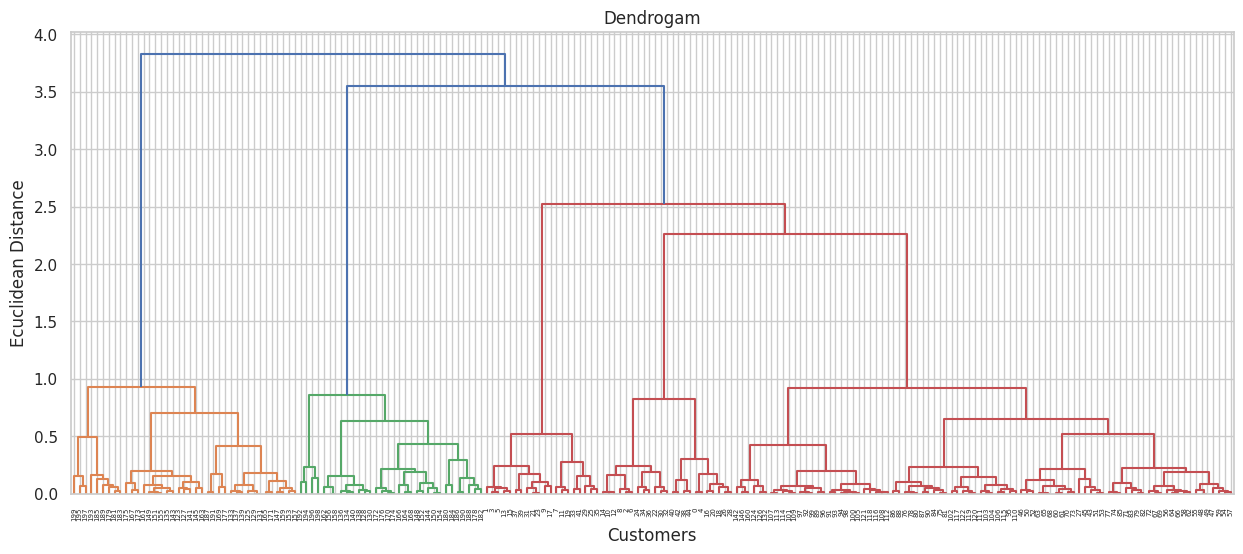

In [26]:
plt.figure(figsize = (15,6))
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

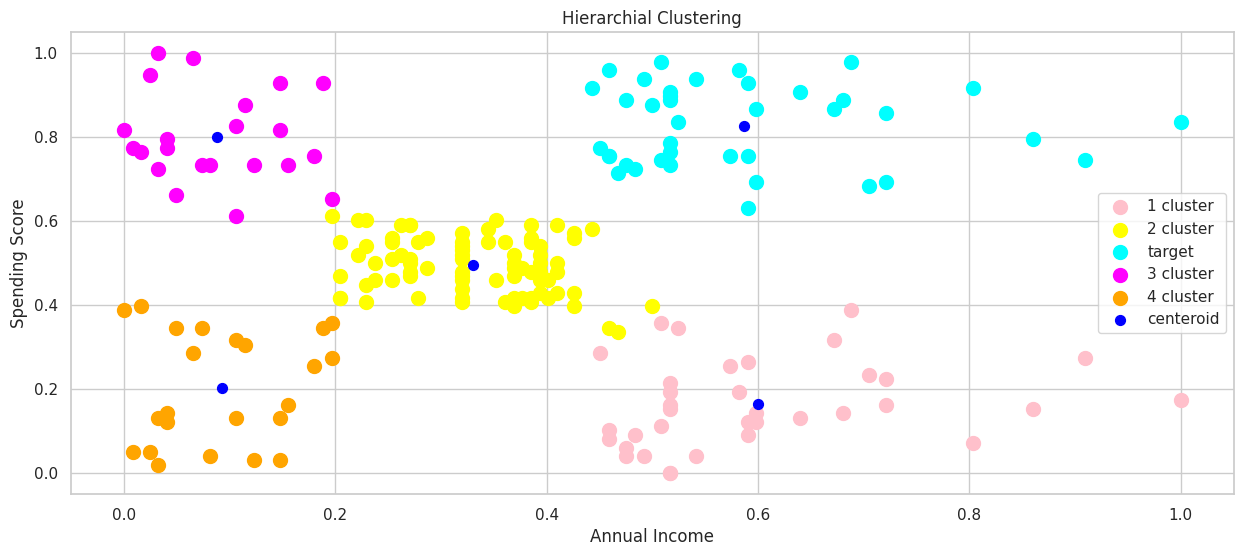

In [27]:
plt.figure(figsize = (15,6))

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = '1 cluster')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = '2 cluster')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = '3 cluster')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = '4 cluster')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()